In [1]:
# EDA on the hotel reservations dataset
# https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../datasets/Hotel Reservations.csv


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, preprocessing

In [4]:
df=pd.read_csv('../datasets/Hotel Reservations.csv')

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [9]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [10]:
df['total_occupants'] = df['no_of_adults'] + df['no_of_children']
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_occupants
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


In [11]:
df['total_days'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

In [12]:
cols = list(df.columns.values)
new_cols = ['Booking_ID',
 'no_of_adults',
 'no_of_children',
 'total_occupants',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'total_days',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']
df_new = df[new_cols]
df_new.head()

,Booking_ID,no_of_adults,no_of_children,total_occupants,no_of_weekend_nights,no_of_week_nights,total_days,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,2,1,2,3,Meal Plan 1,0,Room_Type 1,...,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,2,3,5,Not Selected,0,Room_Type 1,...,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,1,2,1,3,Meal Plan 1,0,Room_Type 1,...,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,2,0,2,2,Meal Plan 1,0,Room_Type 1,...,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,2,1,1,2,Not Selected,0,Room_Type 1,...,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [13]:
df_new[df['no_of_children']>0]

,Booking_ID,no_of_adults,no_of_children,total_occupants,no_of_weekend_nights,no_of_week_nights,total_days,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,2,0,3,3,Meal Plan 1,0,Room_Type 2,...,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
60,INN00061,2,2,4,0,1,1,Meal Plan 1,1,Room_Type 6,...,2018,9,2,Online,0,0,0,258.00,1,Not_Canceled
80,INN00081,2,2,4,0,2,2,Meal Plan 1,0,Room_Type 6,...,2018,4,1,Online,0,0,0,159.30,0,Canceled
95,INN00096,2,1,3,0,2,2,Meal Plan 1,1,Room_Type 1,...,2018,8,4,Online,0,0,0,130.50,2,Not_Canceled
99,INN00100,2,2,4,1,3,4,Meal Plan 1,0,Room_Type 6,...,2018,12,22,Online,0,0,0,156.90,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,INN36222,2,2,4,2,4,6,Meal Plan 1,0,Room_Type 6,...,2018,9,24,Online,0,0,0,207.90,1,Not_Canceled
36227,INN36228,2,2,4,0,1,1,Meal Plan 1,0,Room_Type 6,...,2018,8,6,Online,0,0,0,231.00,1,Not_Canceled
36231,INN36232,2,1,3,0,2,2,Meal Plan 1,0,Room_Type 1,...,2018,6,28,Online,0,0,0,167.00,1,Not_Canceled
36249,INN36250,2,2,4,0,3,3,Meal Plan 1,0,Room_Type 6,...,2018,7,27,Online,0,0,0,177.30,0,Canceled


In [14]:
df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='no_of_adults')

,count
no_of_adults,
0,139
1,7695
2,26108
3,2317
4,16


In [15]:
df.groupby(['no_of_adults','no_of_children'])['Booking_ID'].count()

no_of_adults  no_of_children
0             1                     1
              2                   133
              3                     5
1             0                  7551
              1                    90
              2                    53
              9                     1
2             0                 23719
              1                  1502
              2                   871
              3                    14
              9                     1
              10                    1
3             0                  2291
              1                    25
              2                     1
4             0                    16
Name: Booking_ID, dtype: int64

In [16]:
df.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
no_of_children,
0,33577
1,1618
2,1058
3,19
9,2
10,1


In [17]:
df.groupby('total_occupants')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
#.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Adults',figsize=(9,9))

,count
total_occupants,
2,23942
1,7552
3,3851
4,912
5,15
10,1
11,1
12,1


In [18]:
df_new[df['total_occupants']>4]

,Booking_ID,no_of_adults,no_of_children,total_occupants,no_of_weekend_nights,no_of_week_nights,total_days,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5179,INN05180,3,2,5,0,2,2,Meal Plan 1,0,Room_Type 2,...,2018,8,30,Online,0,0,0,93.70,1,Not_Canceled
5657,INN05658,2,3,5,0,1,1,Meal Plan 1,0,Room_Type 6,...,2017,8,29,Online,0,0,0,153.00,2,Not_Canceled
6338,INN06339,2,10,12,0,2,2,Meal Plan 1,0,Room_Type 4,...,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled
10041,INN10042,1,9,10,2,1,3,Meal Plan 1,0,Room_Type 1,...,2017,10,11,Corporate,0,0,0,95.00,0,Not_Canceled
10061,INN10062,2,9,11,2,5,7,Meal Plan 1,0,Room_Type 2,...,2017,8,13,Online,0,0,0,76.50,1,Canceled
11530,INN11531,2,3,5,0,2,2,Meal Plan 1,0,Room_Type 7,...,2018,8,2,Online,0,0,0,266.30,0,Canceled
13297,INN13298,2,3,5,0,2,2,Meal Plan 1,0,Room_Type 7,...,2017,12,17,Complementary,0,0,0,0.00,0,Not_Canceled
16030,INN16031,2,3,5,0,1,1,Meal Plan 1,0,Room_Type 2,...,2017,12,11,Complementary,0,0,0,0.00,0,Not_Canceled
17532,INN17533,2,3,5,2,0,2,Meal Plan 1,0,Room_Type 6,...,2017,8,9,Online,0,0,0,153.00,0,Not_Canceled
20805,INN20806,2,3,5,0,5,5,Meal Plan 2,0,Room_Type 6,...,2018,12,13,Online,0,0,0,196.35,2,Not_Canceled


array([<AxesSubplot: ylabel='count'>], dtype=object)

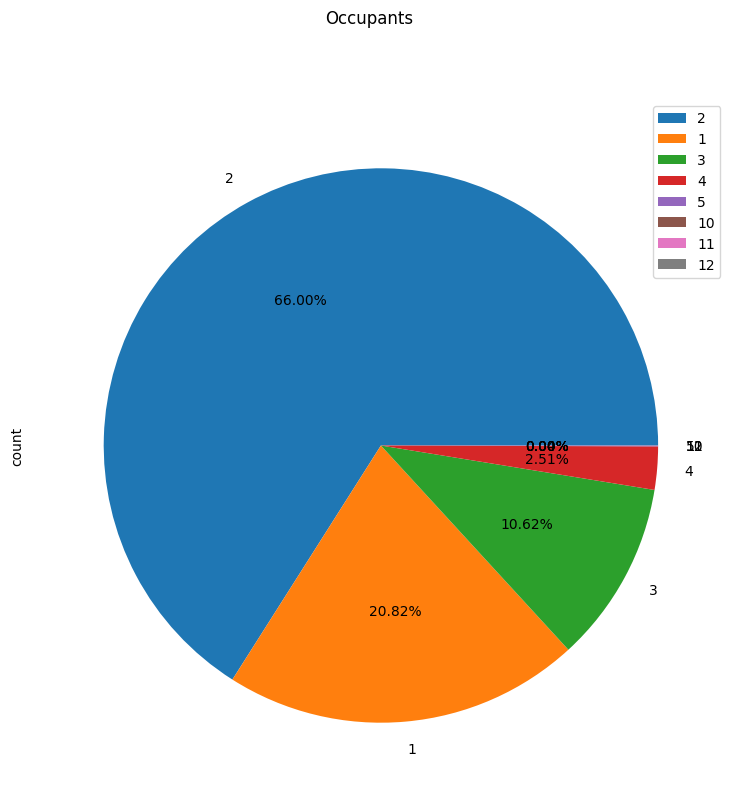

In [19]:
df.groupby('total_occupants')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Occupants',figsize=(9,9))

In [20]:
df.groupby('no_of_weekend_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
no_of_weekend_nights,
0,16872
1,9995
2,9071
3,153
4,129
5,34
6,20
7,1


In [21]:
df.groupby('total_days')['Booking_ID'].agg(['count'])

,count
total_days,
0,78
1,6604
2,8472
3,10052
4,5893
5,2589
6,1031
7,973
8,179


In [22]:
t = df.groupby('total_days')['Booking_ID'].agg(['count'])

In [23]:
# more than 8 days sum
t[8:].sum()[0]

583

In [24]:
temp_df = t
t = t.drop(t.index[8:])
t.loc["8+"] = temp_df[8:].sum()[0]

array([<AxesSubplot: ylabel='count'>], dtype=object)

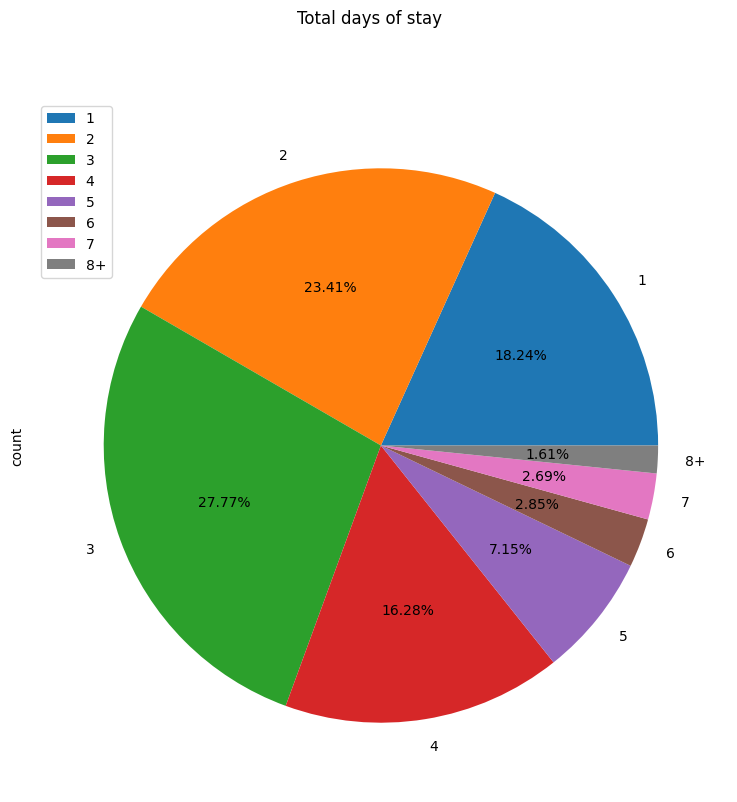

In [25]:
# plot totay days of stay, ignore 0 days
t[1:].plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Total days of stay',figsize=(9,9))

In [26]:
df_new[df['no_of_weekend_nights']>2]

,Booking_ID,no_of_adults,no_of_children,total_occupants,no_of_weekend_nights,no_of_week_nights,total_days,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
194,INN00195,2,0,2,4,10,14,Meal Plan 1,0,Room_Type 4,...,2018,8,3,Online,0,0,0,118.88,1,Canceled
380,INN00381,2,0,2,4,11,15,Meal Plan 1,0,Room_Type 4,...,2018,9,13,Online,0,0,0,116.62,1,Canceled
448,INN00449,2,0,2,3,5,8,Meal Plan 1,0,Room_Type 4,...,2018,4,4,Online,0,0,0,126.75,0,Canceled
477,INN00478,2,0,2,3,7,10,Not Selected,0,Room_Type 1,...,2018,12,5,Online,0,0,0,46.63,1,Not_Canceled
539,INN00540,1,0,1,6,15,21,Meal Plan 1,0,Room_Type 4,...,2018,3,30,Online,0,0,0,128.06,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35737,INN35738,2,0,2,3,7,10,Meal Plan 1,0,Room_Type 1,...,2018,8,22,Online,0,0,0,65.49,0,Canceled
35778,INN35779,3,0,3,4,10,14,Meal Plan 1,0,Room_Type 4,...,2018,7,2,Online,0,0,0,145.93,0,Canceled
35784,INN35785,2,0,2,4,8,12,Meal Plan 1,0,Room_Type 4,...,2018,2,12,Online,0,0,0,106.83,0,Canceled
35904,INN35905,2,2,4,4,10,14,Meal Plan 1,0,Room_Type 6,...,2018,3,25,Online,0,0,0,170.61,0,Canceled


<AxesSubplot: title={'center': 'Booking by Month'}, xlabel='arrival_month'>

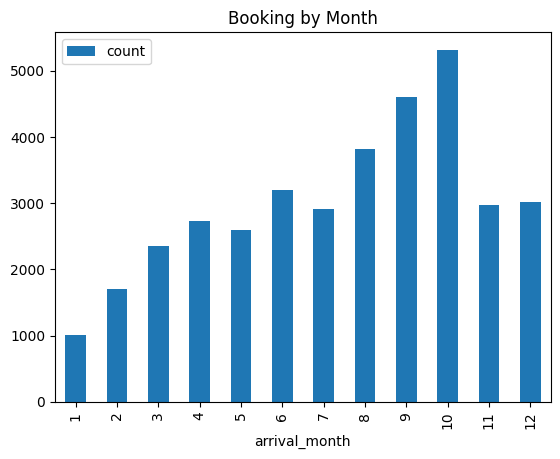

In [27]:
# Seasonality of booking
df.groupby('arrival_month')['Booking_ID'].agg(['count']).plot(kind='bar',title='Booking by Month',)

array([<AxesSubplot: ylabel='count'>], dtype=object)

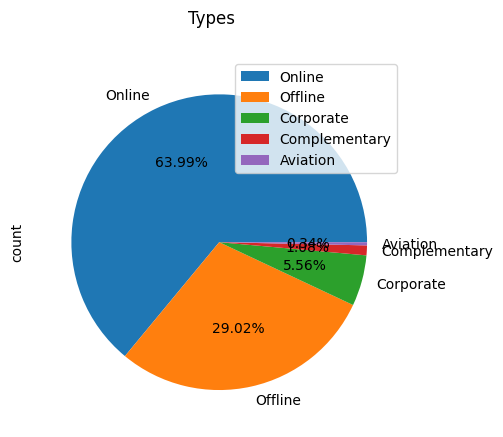

In [28]:
df.groupby('market_segment_type')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Types')

In [29]:
# repeat guest percentage
print(df[df['repeated_guest']>0].count()[0]/df.count()[0] * 100, '%')

2.563749138525155 %


In [30]:
# no cancellations percentage
print(df[df['no_of_previous_cancellations']==0].count()[0]/df.count()[0] * 100, '%')

99.06822880771881 %


In [31]:
# meal plan correlations

# df_new['type_of_meal_plan'].unique()
df_new.groupby(['room_type_reserved'])['Booking_ID'].count()

room_type_reserved
Room_Type 1    28130
Room_Type 2      692
Room_Type 3        7
Room_Type 4     6057
Room_Type 5      265
Room_Type 6      966
Room_Type 7      158
Name: Booking_ID, dtype: int64

In [32]:
df_new[df['room_type_reserved']=='Room_Type 4']
# df_new[].unique()

,Booking_ID,no_of_adults,no_of_children,total_occupants,no_of_weekend_nights,no_of_week_nights,total_days,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
7,INN00008,2,0,2,1,3,4,Meal Plan 1,0,Room_Type 4,...,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
9,INN00010,2,0,2,0,5,5,Meal Plan 1,0,Room_Type 4,...,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled
11,INN00012,1,0,1,2,1,3,Meal Plan 1,0,Room_Type 4,...,2018,4,30,Online,0,0,0,140.40,1,Not_Canceled
27,INN00028,1,0,1,0,2,2,Meal Plan 1,0,Room_Type 4,...,2018,5,19,Aviation,0,0,0,110.00,0,Canceled
30,INN00031,2,0,2,1,1,2,Meal Plan 1,0,Room_Type 4,...,2017,9,19,Online,0,0,0,177.50,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36239,INN36240,3,0,3,0,1,1,Meal Plan 1,0,Room_Type 4,...,2018,2,27,Online,0,0,0,130.00,0,Not_Canceled
36258,INN36259,2,0,2,2,2,4,Meal Plan 1,0,Room_Type 4,...,2018,8,13,Online,0,0,0,149.40,2,Not_Canceled
36260,INN36261,3,0,3,1,4,5,Meal Plan 1,1,Room_Type 4,...,2018,8,1,Online,0,0,0,137.25,1,Canceled
36264,INN36265,2,0,2,0,2,2,Meal Plan 1,0,Room_Type 4,...,2018,7,8,Online,0,0,0,105.30,0,Canceled


In [33]:
df_new

,Booking_ID,no_of_adults,no_of_children,total_occupants,no_of_weekend_nights,no_of_week_nights,total_days,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,2,1,2,3,Meal Plan 1,0,Room_Type 1,...,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,2,3,5,Not Selected,0,Room_Type 1,...,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,1,2,1,3,Meal Plan 1,0,Room_Type 1,...,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,2,0,2,2,Meal Plan 1,0,Room_Type 1,...,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,2,1,1,2,Not Selected,0,Room_Type 1,...,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,3,2,6,8,Meal Plan 1,0,Room_Type 4,...,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,2,1,3,4,Meal Plan 1,0,Room_Type 1,...,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,2,6,8,Meal Plan 1,0,Room_Type 1,...,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,2,0,3,3,Not Selected,0,Room_Type 1,...,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [34]:
df_new

,Booking_ID,no_of_adults,no_of_children,total_occupants,no_of_weekend_nights,no_of_week_nights,total_days,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,2,1,2,3,Meal Plan 1,0,Room_Type 1,...,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,2,3,5,Not Selected,0,Room_Type 1,...,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,1,2,1,3,Meal Plan 1,0,Room_Type 1,...,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,2,0,2,2,Meal Plan 1,0,Room_Type 1,...,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,2,1,1,2,Not Selected,0,Room_Type 1,...,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,3,2,6,8,Meal Plan 1,0,Room_Type 4,...,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,2,1,3,4,Meal Plan 1,0,Room_Type 1,...,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,2,6,8,Meal Plan 1,0,Room_Type 1,...,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,2,0,3,3,Not Selected,0,Room_Type 1,...,2018,4,21,Online,0,0,0,94.50,0,Canceled
